In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('BORIVALI_DWLR_REALTIME_multi.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

In [13]:
df

,timestamp,month,station_id,latitude,longitude,water_level_m,rainfall_mm,demand_mcm,aquifer_area_sqkm,specific_yield,temperature_c,land_use_type,policy_active,delta_h,recharge,availability,status
0,2023-01-19 01:00:00,1,Station_01,19.221162,72.857324,9.006755,0.187270,0.002656,2.0,0.15,22.918057,Urban,False,0.000000,0.000000,-2655.994520,Semi-Critical
1,2023-01-19 01:00:00,1,Station_05,19.223993,72.850285,8.991968,0.187270,0.003285,2.0,0.15,22.918057,Urban,False,0.000000,0.000000,-3285.175961,Semi-Critical
2,2023-01-19 01:00:00,1,Station_02,19.223668,72.846085,8.994060,0.187270,0.003101,2.0,0.15,22.918057,Urban,False,0.000000,0.000000,-3101.115012,Semi-Critical
3,2023-01-19 01:00:00,1,Station_04,19.227327,72.849121,8.996372,0.187270,0.003112,2.0,0.15,22.918057,Urban,False,0.000000,0.000000,-3111.852895,Semi-Critical
4,2023-01-19 01:00:00,1,Station_03,19.228639,72.845825,8.994758,0.187270,0.003025,2.0,0.15,22.918057,Urban,False,0.000000,0.000000,-3024.756432,Semi-Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131398,2026-01-18 00:00:00,1,Station_03,19.227158,72.855408,4.012385,0.275343,0.003017,2.0,0.15,23.668443,Urban,True,-0.016227,0.000000,-3017.255430,Safe
131395,2026-01-18 00:00:00,1,Station_04,19.229431,72.853593,4.003999,0.275343,0.003287,2.0,0.15,23.668443,Urban,True,-0.024208,0.000000,-3286.705782,Safe
131396,2026-01-18 00:00:00,1,Station_02,19.238529,72.845449,3.178290,0.275343,0.002711,2.0,0.15,23.668443,Urban,True,0.007446,2233.718651,-477.276043,Safe
131397,2026-01-18 00:00:00,1,Station_01,19.234939,72.850250,4.379169,0.275343,0.002780,2.0,0.15,23.668443,Urban,True,0.001983,594.806079,-2184.797359,Safe


In [14]:
def create_features(df):
    df = df.copy()
    df['hour'] = df['timestamp'].dt.hour
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    df['quarter'] = df['timestamp'].dt.quarter
    df['month'] = df['timestamp'].dt.month
    df['year'] = df['timestamp'].dt.year
    df['dayofyear'] = df['timestamp'].dt.dayofyear
    return df

df = create_features(df)

In [15]:
df

,timestamp,month,station_id,latitude,longitude,water_level_m,rainfall_mm,demand_mcm,aquifer_area_sqkm,specific_yield,...,policy_active,delta_h,recharge,availability,status,hour,dayofweek,quarter,year,dayofyear
0,2023-01-19 01:00:00,1,Station_01,19.221162,72.857324,9.006755,0.187270,0.002656,2.0,0.15,...,False,0.000000,0.000000,-2655.994520,Semi-Critical,1,3,1,2023,19
1,2023-01-19 01:00:00,1,Station_05,19.223993,72.850285,8.991968,0.187270,0.003285,2.0,0.15,...,False,0.000000,0.000000,-3285.175961,Semi-Critical,1,3,1,2023,19
2,2023-01-19 01:00:00,1,Station_02,19.223668,72.846085,8.994060,0.187270,0.003101,2.0,0.15,...,False,0.000000,0.000000,-3101.115012,Semi-Critical,1,3,1,2023,19
3,2023-01-19 01:00:00,1,Station_04,19.227327,72.849121,8.996372,0.187270,0.003112,2.0,0.15,...,False,0.000000,0.000000,-3111.852895,Semi-Critical,1,3,1,2023,19
4,2023-01-19 01:00:00,1,Station_03,19.228639,72.845825,8.994758,0.187270,0.003025,2.0,0.15,...,False,0.000000,0.000000,-3024.756432,Semi-Critical,1,3,1,2023,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131398,2026-01-18 00:00:00,1,Station_03,19.227158,72.855408,4.012385,0.275343,0.003017,2.0,0.15,...,True,-0.016227,0.000000,-3017.255430,Safe,0,6,1,2026,18
131395,2026-01-18 00:00:00,1,Station_04,19.229431,72.853593,4.003999,0.275343,0.003287,2.0,0.15,...,True,-0.024208,0.000000,-3286.705782,Safe,0,6,1,2026,18
131396,2026-01-18 00:00:00,1,Station_02,19.238529,72.845449,3.178290,0.275343,0.002711,2.0,0.15,...,True,0.007446,2233.718651,-477.276043,Safe,0,6,1,2026,18
131397,2026-01-18 00:00:00,1,Station_01,19.234939,72.850250,4.379169,0.275343,0.002780,2.0,0.15,...,True,0.001983,594.806079,-2184.797359,Safe,0,6,1,2026,18


In [16]:
df = pd.get_dummies(df, columns=['status'], dtype=int)

# Identify the names of the newly created status columns
status_cols = [col for col in df.columns if col.startswith('status_')]

# 4. Prepare Training Targets and Features
# We include numerical targets AND our one-hot encoded status columns
targets = ['water_level_m', 'rainfall_mm', 'temperature_c', 'demand_mcm', 'availability'] + status_cols
features = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']

In [17]:
last_timestamp = df['timestamp'].max()
future_timestamps = pd.date_range(
    start=last_timestamp + pd.Timedelta(hours=1), 
    periods=24, 
    freq='h'
)
future_df = pd.DataFrame({'timestamp': future_timestamps})
future_df = create_features(future_df)

In [18]:
df

,timestamp,month,station_id,latitude,longitude,water_level_m,rainfall_mm,demand_mcm,aquifer_area_sqkm,specific_yield,...,recharge,availability,hour,dayofweek,quarter,year,dayofyear,status_Critical,status_Safe,status_Semi-Critical
0,2023-01-19 01:00:00,1,Station_01,19.221162,72.857324,9.006755,0.187270,0.002656,2.0,0.15,...,0.000000,-2655.994520,1,3,1,2023,19,0,0,1
1,2023-01-19 01:00:00,1,Station_05,19.223993,72.850285,8.991968,0.187270,0.003285,2.0,0.15,...,0.000000,-3285.175961,1,3,1,2023,19,0,0,1
2,2023-01-19 01:00:00,1,Station_02,19.223668,72.846085,8.994060,0.187270,0.003101,2.0,0.15,...,0.000000,-3101.115012,1,3,1,2023,19,0,0,1
3,2023-01-19 01:00:00,1,Station_04,19.227327,72.849121,8.996372,0.187270,0.003112,2.0,0.15,...,0.000000,-3111.852895,1,3,1,2023,19,0,0,1
4,2023-01-19 01:00:00,1,Station_03,19.228639,72.845825,8.994758,0.187270,0.003025,2.0,0.15,...,0.000000,-3024.756432,1,3,1,2023,19,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131398,2026-01-18 00:00:00,1,Station_03,19.227158,72.855408,4.012385,0.275343,0.003017,2.0,0.15,...,0.000000,-3017.255430,0,6,1,2026,18,0,1,0
131395,2026-01-18 00:00:00,1,Station_04,19.229431,72.853593,4.003999,0.275343,0.003287,2.0,0.15,...,0.000000,-3286.705782,0,6,1,2026,18,0,1,0
131396,2026-01-18 00:00:00,1,Station_02,19.238529,72.845449,3.178290,0.275343,0.002711,2.0,0.15,...,2233.718651,-477.276043,0,6,1,2026,18,0,1,0
131397,2026-01-18 00:00:00,1,Station_01,19.234939,72.850250,4.379169,0.275343,0.002780,2.0,0.15,...,594.806079,-2184.797359,0,6,1,2026,18,0,1,0


In [19]:
models = {}
for target in targets:
    print(f'Training model for: {target}')
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    # Train using the features and the specific target
    model.fit(df[features], df[target])
    models[target] = model
    
    # Generate 24-hour prediction
    future_df[target] = model.predict(future_df[features])

# 7. Convert One-Hot Predictions back to Categorical Labels
# For each row, find the column among status_cols that has the highest value
future_df['predicted_status'] = future_df[status_cols].idxmax(axis=1)

# Clean up the string (e.g., "status_Safe" -> "Safe")
future_df['predicted_status'] = future_df['predicted_status'].str.replace('status_', '')

Training model for: water_level_m
Training model for: rainfall_mm
Training model for: temperature_c
Training model for: demand_mcm
Training model for: availability
Training model for: status_Critical
Training model for: status_Safe
Training model for: status_Semi-Critical


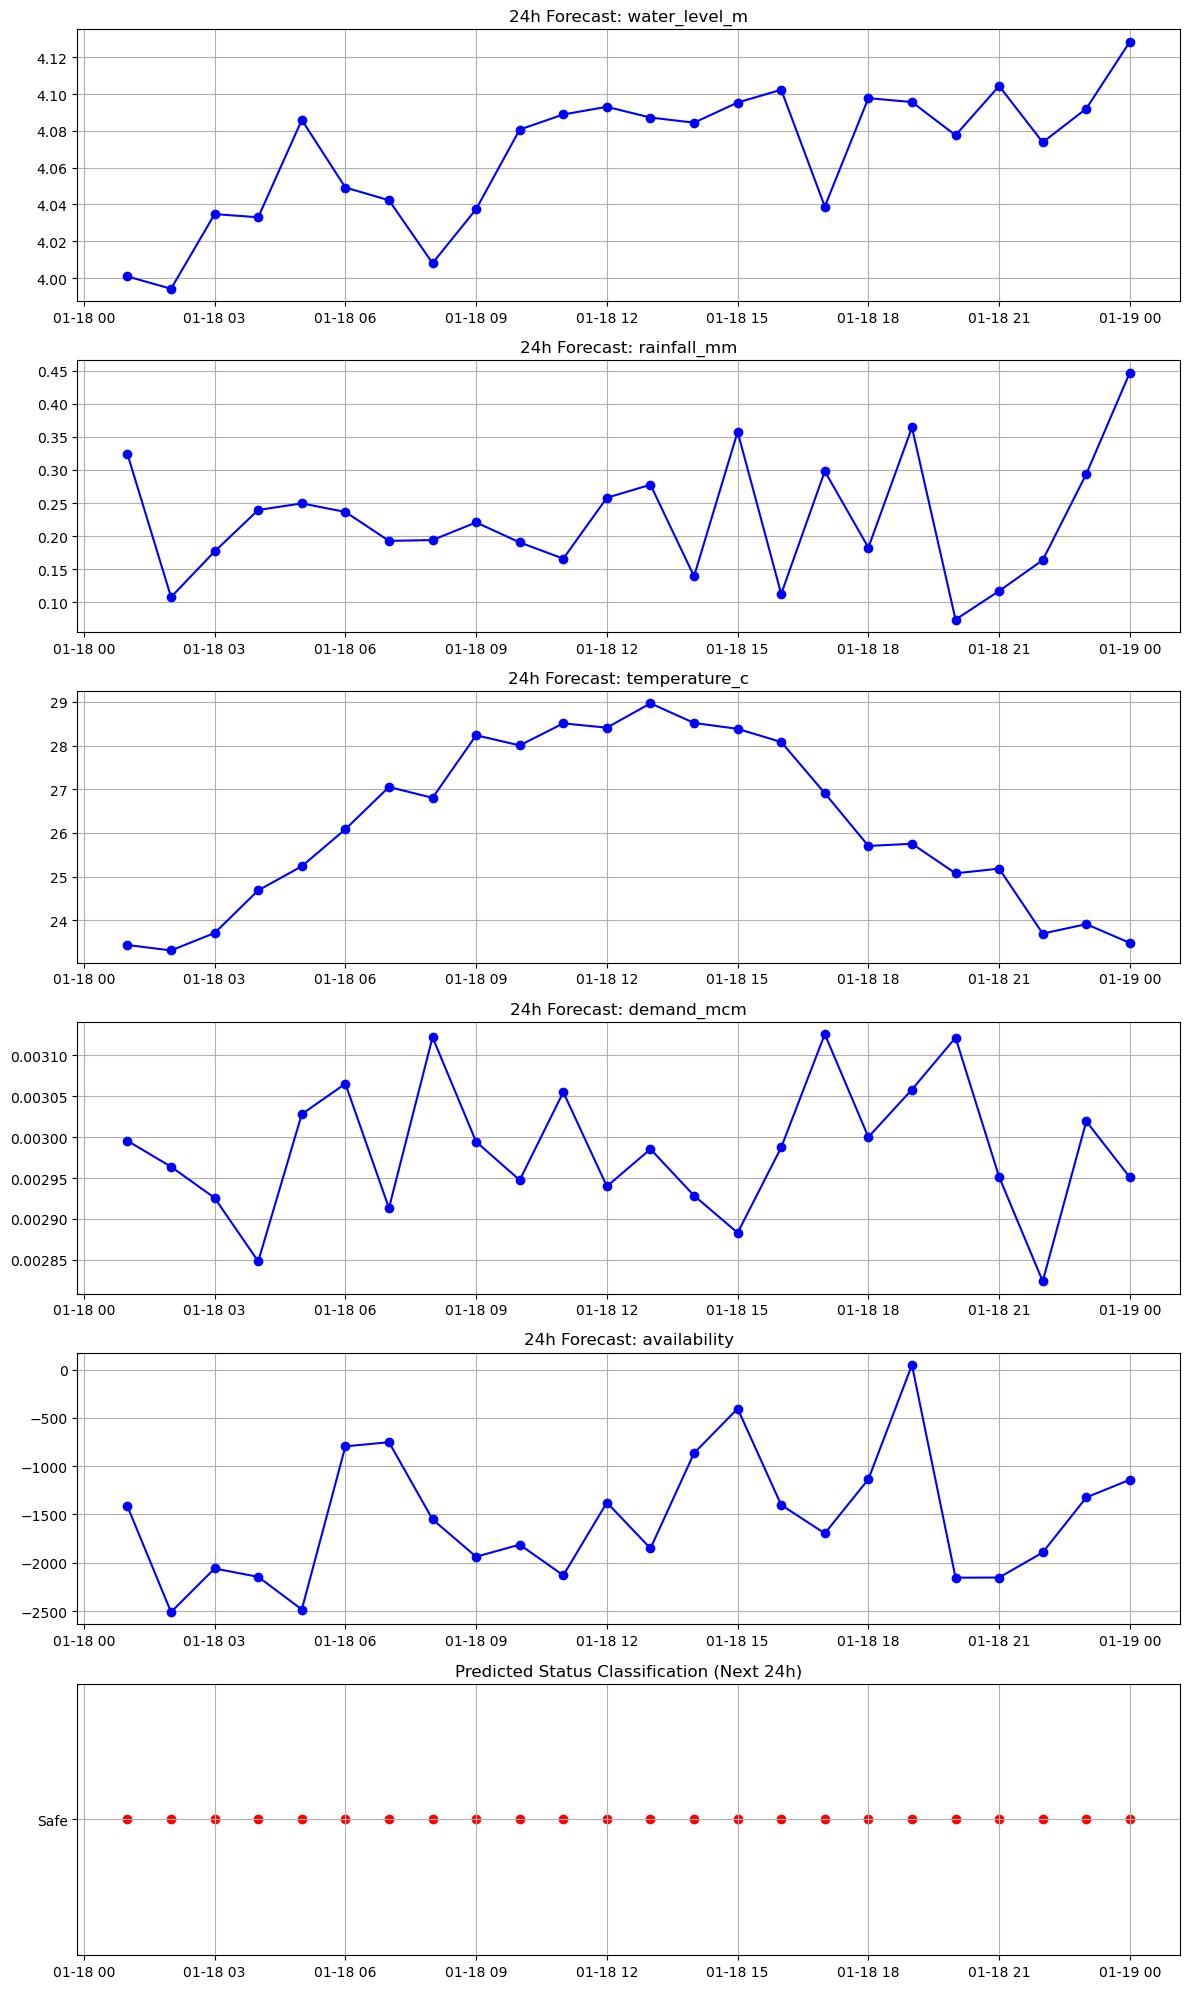

             timestamp  water_level_m predicted_status
0  2026-01-18 01:00:00       4.000843             Safe
1  2026-01-18 02:00:00       3.994153             Safe
2  2026-01-18 03:00:00       4.034759             Safe
3  2026-01-18 04:00:00       4.033028             Safe
4  2026-01-18 05:00:00       4.085973             Safe
5  2026-01-18 06:00:00       4.049212             Safe
6  2026-01-18 07:00:00       4.042300             Safe
7  2026-01-18 08:00:00       4.008081             Safe
8  2026-01-18 09:00:00       4.037448             Safe
9  2026-01-18 10:00:00       4.080746             Safe
10 2026-01-18 11:00:00       4.088949             Safe
11 2026-01-18 12:00:00       4.093120             Safe
12 2026-01-18 13:00:00       4.087269             Safe
13 2026-01-18 14:00:00       4.084486             Safe
14 2026-01-18 15:00:00       4.095449             Safe
15 2026-01-18 16:00:00       4.102391             Safe
16 2026-01-18 17:00:00       4.038868             Safe
17 2026-01

In [20]:
fig, axes = plt.subplots(nrows=len(targets) - len(status_cols) + 1, ncols=1, figsize=(12, 20))

# Plot numerical targets
numerical_targets = ['water_level_m', 'rainfall_mm', 'temperature_c', 'demand_mcm', 'availability']
for i, target in enumerate(numerical_targets):
    axes[i].plot(future_df['timestamp'], future_df[target], 
                 label='Predicted', marker='o', color='blue')
    axes[i].set_title(f'24h Forecast: {target}')
    axes[i].grid(True)

# Visualize the Predicted Status (Classification)
# Using a simple scatter plot to show the category over time
axes[-1].scatter(future_df['timestamp'], future_df['predicted_status'], color='red')
axes[-1].set_title('Predicted Status Classification (Next 24h)')
axes[-1].grid(True)

plt.tight_layout()
plt.show()

# Display the final prediction table
print(future_df[['timestamp', 'water_level_m', 'predicted_status']])

In [21]:
future_df

,timestamp,hour,dayofweek,quarter,month,year,dayofyear,water_level_m,rainfall_mm,temperature_c,demand_mcm,availability,status_Critical,status_Safe,status_Semi-Critical,predicted_status
0,2026-01-18 01:00:00,1,6,1,1,2026,18,4.000843,0.323791,23.434095,0.002996,-1416.391527,0.0,0.996000,0.000000,Safe
1,2026-01-18 02:00:00,2,6,1,1,2026,18,3.994153,0.107846,23.309887,0.002964,-2510.522953,0.0,0.992667,0.000000,Safe
2,2026-01-18 03:00:00,3,6,1,1,2026,18,4.034759,0.176774,23.708537,0.002926,-2058.899058,0.0,0.985833,0.000000,Safe
3,2026-01-18 04:00:00,4,6,1,1,2026,18,4.033028,0.239518,24.685090,0.002848,-2145.859247,0.0,0.992738,0.000000,Safe
4,2026-01-18 05:00:00,5,6,1,1,2026,18,4.085973,0.249414,25.236883,0.003028,-2483.721623,0.0,0.969750,0.000000,Safe
5,2026-01-18 06:00:00,6,6,1,1,2026,18,4.049212,0.236523,26.084676,0.003065,-794.450858,0.0,0.980833,0.006667,Safe
6,2026-01-18 07:00:00,7,6,1,1,2026,18,4.042300,0.192798,27.052125,0.002913,-751.317201,0.0,0.979833,0.007500,Safe
7,2026-01-18 08:00:00,8,6,1,1,2026,18,4.008081,0.194024,26.803893,0.003122,-1550.504669,0.0,0.977611,0.000000,Safe
8,2026-01-18 09:00:00,9,6,1,1,2026,18,4.037448,0.220703,28.236471,0.002994,-1937.286591,0.0,0.980893,0.001250,Safe
9,2026-01-18 10:00:00,10,6,1,1,2026,18,4.080746,0.190463,28.003866,0.002948,-1811.991667,0.0,0.972306,0.005000,Safe


In [22]:
future_df.to_csv("24_prediction.csv")